In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import itertools
from functools import total_ordering
from numpy.random import default_rng

#our classes!!! :)
from ParticleSim import Disk
from ParticleSim import Expt

MovieWriter ffmpeg unavailable; using Pillow instead.


Initial KE: 2353.0634724505835
Initial PE: 3984.897222667378
Initial Total E: 6337.960695117961
initializing experiment... 
starting simulation... 


IndexError: list index out of range

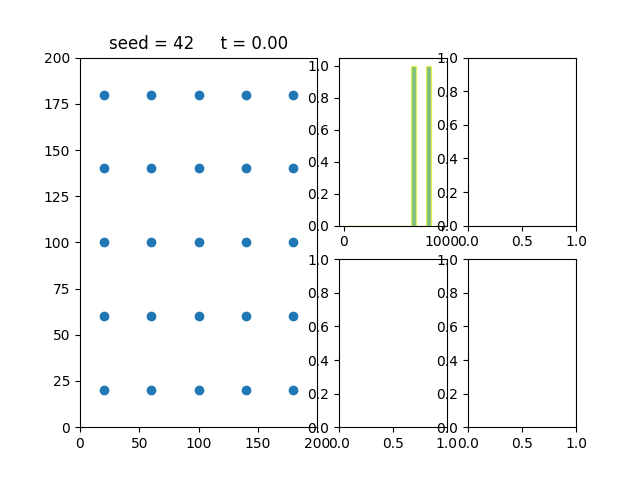

In [2]:
# TEST CELL FOR showAnimation
seed = 42
rng = default_rng(seed=seed) # instantiate the default random number generator
sqrtNumParts = 5

pPosGrid = list(itertools.product(np.linspace(20, 180,sqrtNumParts), np.linspace(20,180,sqrtNumParts)))
pVelGrid = list((rng.random(size=(sqrtNumParts**2,2))-.5)*100) #randomize initial velocities

particles = [Disk(pPosGrid[i], pVelGrid[i]) for i in range(sqrtNumParts**2)]

e1 = Expt(particles, dt=0.001, tmax=0.1, animSpeed=500, updateGraphsEvery=35, 
          potentialType="Coul", doCollisions=True)

print("Initial KE:",e1.avgKE)
print("Initial PE:",e1.avgPE)
print("Initial Total E:",e1.avgE)
e1.showAnimation1("seed = " + str(seed) + "     ")
print("Final KE:",e1.avgKE)
print("Final PE:",e1.avgPE)
print("Final Total E:",e1.avgE)

In [1]:
plt.close("all")

NameError: name 'plt' is not defined

In [1]:

#TODO: integrate this functionality. This code copy/pasted.

import tkinter as tk
from PIL import Image, ImageTk

class GifViewer(tk.Frame):
    def __init__(self, master, gif_path):
        super().__init__(master)
        self.master = master
        self.gif_path = gif_path
        self.gif = Image.open(gif_path)
        self.frame_count = self.gif.n_frames
        self.current_frame = 0
        
        # Create the slider
        self.slider = tk.Scale(
            self.master,
            from_=0,
            to=self.frame_count-1,
            orient=tk.HORIZONTAL,
            command=self.set_frame
        )
        self.slider.pack(side=tk.BOTTOM, fill=tk.X)
        
        # Create the label to display the GIF
        self.label = tk.Label(self.master)
        self.label.pack()
        
        # Set the initial frame
        self.set_frame(0)
    
    def set_frame(self, frame):
        self.current_frame = int(frame)
        self.gif.seek(self.current_frame)
        photo = ImageTk.PhotoImage(self.gif)
        self.label.config(image=photo)
        self.label.image = photo
        
    def run(self):
        self.master.mainloop()
        
if __name__ == '__main__':
    root = tk.Tk()
    root.title('GIF Viewer')
    gif_path = 'particleAnimation.gif'
    viewer = GifViewer(root, gif_path)
    viewer.run()
